In [3]:
using DelimitedFiles
using Formatting: printfmt
using Plots
using ScHoLP
using Statistics

# Load true output and estimated output.

In [15]:
dataset_name = "email-Enron"
mode = "closed"  # closed or all

true_filename = "../output/num_simplices_$(mode)_exact_$dataset_name.txt"
estimated_filename = "../output/num_simplices_$(mode)_sampling_$dataset_name.txt"

true_file = open(true_filename, "r")
estimated_file = open(estimated_filename, "r")

true_output = readlines(true_file)
estimated_output = readlines(estimated_file)

close(true_file)
close(estimated_file)

l = size(true_output)[1]
true_triangles, true_time = true_output[1:l-1], true_output[l]
T = Tuple{Float64,Tuple{Int64,Int64,Int64}}
tmp = Array{T,1}(undef, l-1)
for (i, triangle) in enumerate(true_triangles)
    w, t = split(triangle, "\t")
    w = parse(Float64, w)
    a, b, c = split(t, ",")
    a = parse(Int64, a[2:end])
    b = parse(Int64, b)
    c = parse(Int64, c[1:end-1])
    tmp[i] = (w, (a,b,c))
end
true_triangles = tmp

l = size(estimated_output)[1]
estimated_triangles, estimated_time = estimated_output[1:l-4], estimated_output[l-3]
T = Tuple{Float64,Tuple{Int64,Int64,Int64}}
tmp = Array{T,1}(undef, l-4)
for (i, triangle) in enumerate(estimated_triangles)
    w, t = split(triangle, "\t")
    w = parse(Float64, w)
    a, b, c = split(t, ",")
    a = parse(Int64, a[2:end])
    b = parse(Int64, b)
    c = parse(Int64, c[1:end-1])
    tmp[i] = (w, (a,b,c))
end
estimated_triangles = tmp
k = split(estimated_output[l-2], " ")[2]
k = parse(Int64, k)
kprime = split(estimated_output[l-1], " ")[2]
kprime = parse(Int64, kprime)
num_samples = split(estimated_output[l], " ")[2]
num_samples = parse(Int64, num_samples)

printfmt("kprime: {}, k: {}\n", kprime, k)
printfmt("num_samples: {}\n", num_samples)

kprime: 500, k: 25


In [16]:
# dataset_name = "email-Enron"
# mode = "closed"  # closed or all
# 
# true_filename = "../output/num_simplices_$(mode)_exact_$dataset_name.txt"
# estimated_filename = "../output/num_simplices_$(mode)_sampling_$dataset_name.txt"
# 
# true_file = open(true_filename, "r")
# estimated_file = open(estimated_filename, "r")
# 
# true_output = readdlm(true_file)
# estimated_output = readdlm(estimated_file)
# 
# close(true_file)
# close(estimated_file)
# 
# l = size(true_output)[1]
# true_triangles, true_time = true_output[1:l-1, :], true_output[l, :][2]
# true_triangles[:, 2] = map(x -> parse(Int64, x[2:length(x)-1]), true_triangles[:, 2])
# true_triangles[:, 3] = map(x -> parse(Int64, x[1:length(x)-1]), true_triangles[:, 3])
# true_triangles[:, 4] = map(x -> parse(Int64, x[1:length(x)-1]), true_triangles[:, 4])
# tmp = []
# for i in range(1, stop=l-1)
#     w, a, b, c = true_triangles[i, :]
#     push!(tmp, (w, (a,b,c)))
# end
# true_triangles = tmp
# 
# l = size(estimated_output)[1]
# estimated_triangles, estimated_time = estimated_output[1:l-3, :], estimated_output[l-2, 2]
# estimated_triangles[:, 2] = map(x -> parse(Int64, x[2:length(x)-1]), estimated_triangles[:, 2])
# estimated_triangles[:, 3] = map(x -> parse(Int64, x[1:length(x)-1]), estimated_triangles[:, 3])
# estimated_triangles[:, 4] = map(x -> parse(Int64, x[1:length(x)-1]), estimated_triangles[:, 4])
# tmp = []
# for i in range(1, stop=l-3)
#     w, a, b, c = estimated_triangles[i, :]
#     push!(tmp, (w, (a,b,c)))
# end
# estimated_triangles = tmp
# k = estimated_output[l-1, 2]
# kprime = estimated_output[l, 2]
#     
# printfmt("kprime: {}, k: {}\n", kprime, k)

# Time.

In [17]:
printfmt("Time taken by exact algorithm: {}\n", true_time)
printfmt("Time taken by sampling algorithm: {}\n", estimated_time)

Time taken by exact algorithm: Time: 0.260261325
Time taken by sampling algorithm: Time: 2.784489723


# Plot distribution of weights in the true and estimated outputs.

There are a total of 6578 triangles in this graph.
μ = 0.7087310728121453, σ = 1.0122714983633136


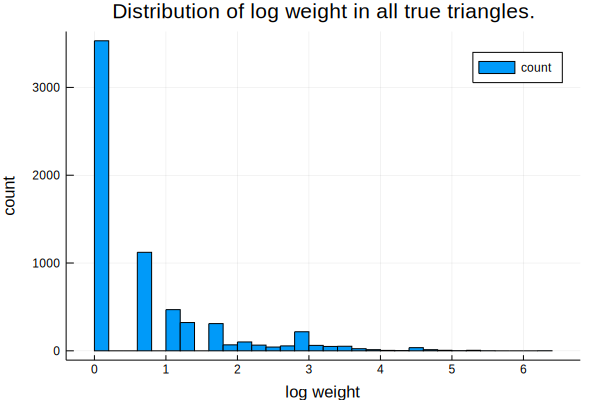

In [18]:
all_true = map(x->log(x[1]), true_triangles[:, 1])
number_triangles = length(all_true)
printfmt("There are a total of {} triangles in this graph.\n", number_triangles)
printfmt("μ = {}, σ = {}\n", mean(all_true), std(all_true))
histogram(all_true, bins=:auto, xlabel="log weight", ylabel="count", label="count",
         title="Distribution of log weight in all true triangles.")

μ = 4.992665249458044, σ = 0.3926739443082878


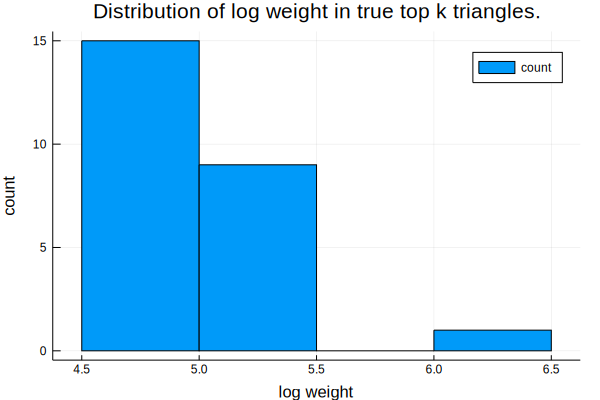

In [19]:
top_k_true = map(x->log(x[1]), true_triangles[1:k, 1])
printfmt("μ = {}, σ = {}\n", mean(top_k_true), std(top_k_true))
histogram(top_k_true, bins=:auto, xlabel="log weight", ylabel="count", label="count",
         title="Distribution of log weight in true top k triangles.")

μ = 4.992665249458044, σ = 0.3926739443082878


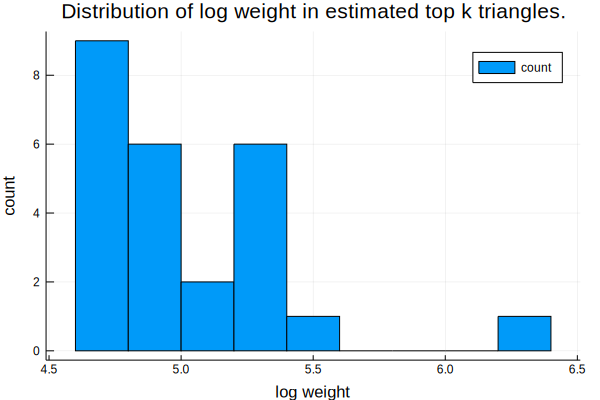

In [20]:
top_k_estimated = map(x->log(x[1]), estimated_triangles[1:k, 1])
printfmt("μ = {}, σ = {}\n", mean(top_k_estimated), std(top_k_estimated))
histogram(top_k_estimated, bins=10, xlabel="log weight", ylabel="count", label="count",
          title="Distribution of log weight in estimated top k triangles.")


# What is the distribution of ranks of estimated triangles?

In [22]:
function find_rank(t)
    return searchsorted(true_triangles, t, by=x->x[1], rev=true)[1]
end

estimated_ranks = [find_rank(t) for t in estimated_triangles]
;

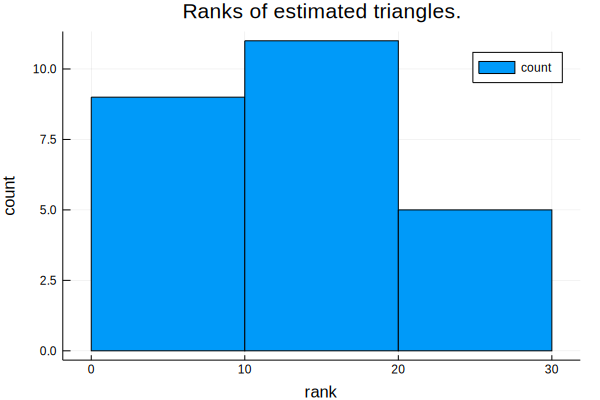

In [23]:
histogram(estimated_ranks, bins=:auto, xlabel="rank", ylabel="count", label="count",
          title="Ranks of estimated triangles.")

# What is the distribution of percentile of the estimated triangles?

In [25]:
estimated_percentiles = [1 - r/number_triangles for r in estimated_ranks]
;

Estimated triangles
Mean percentile: 0.9980966859227727, median percentile: 0.9980237154150198


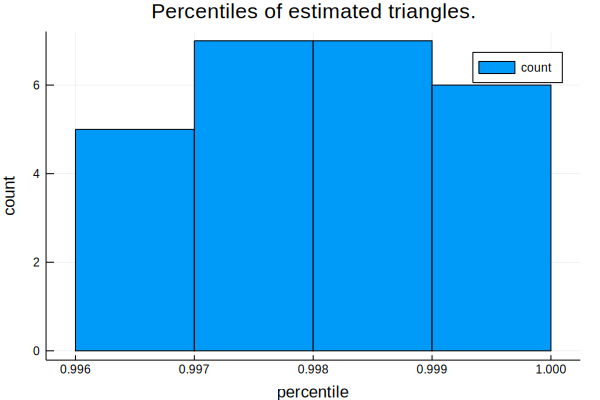

In [26]:
println("Estimated triangles")
printfmt("Mean percentile: {}, median percentile: {}\n",
         mean(estimated_percentiles), median(estimated_percentiles))
histogram(estimated_percentiles, bins=:auto, xlabel="percentile", ylabel="count", label="count",
          title="Percentiles of estimated triangles.")

# How many of the estimated triangles are in the top k?

In [28]:
estimated_accuracy = mean([find_rank(t) <= k for t in estimated_triangles])
printfmt("Estimated accuracy: {}\n", estimated_accuracy)

Estimated accuracy: 1.0
